<a href="https://colab.research.google.com/github/Shiyasalloor/Deep-Learning-Lab/blob/main/Optimizer_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

# Train function
def train_model(optimizer_name, epochs=5):
    model = SimpleNet().to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "GD":
        full_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
        optimizer = optim.SGD(model.parameters(), lr=0.01)
        use_full_batch = True
    else:
        use_full_batch = False
        if optimizer_name == "SGD":
            optimizer = optim.SGD(model.parameters(), lr=0.01)
        elif optimizer_name == "Adam":
            optimizer = optim.Adam(model.parameters(), lr=0.001)
        elif optimizer_name == "RMSprop":
            optimizer = optim.RMSprop(model.parameters(), lr=0.001)
        elif optimizer_name == "Adagrad":
            optimizer = optim.Adagrad(model.parameters(), lr=0.01)
        else:
            raise ValueError("Unsupported optimizer")

    model.train()
    accuracy_list = []

    for epoch in range(epochs):
        correct = 0
        total = 0

        loader = full_loader if use_full_batch else train_loader

        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        accuracy_list.append(accuracy)
        print(f"[{optimizer_name}] Epoch [{epoch+1}/{epochs}], Accuracy: {accuracy:.2f}%")

    return accuracy_list

100%|██████████| 9.91M/9.91M [00:00<00:00, 31.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 996kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.88MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.45MB/s]



Training with GD optimizer:
[GD] Epoch [1/5], Accuracy: 8.53%
[GD] Epoch [2/5], Accuracy: 8.94%
[GD] Epoch [3/5], Accuracy: 9.39%
[GD] Epoch [4/5], Accuracy: 9.84%
[GD] Epoch [5/5], Accuracy: 10.28%

Training with SGD optimizer:
[SGD] Epoch [1/5], Accuracy: 79.82%
[SGD] Epoch [2/5], Accuracy: 90.89%
[SGD] Epoch [3/5], Accuracy: 92.45%
[SGD] Epoch [4/5], Accuracy: 93.64%
[SGD] Epoch [5/5], Accuracy: 94.52%

Training with Adagrad optimizer:
[Adagrad] Epoch [1/5], Accuracy: 92.68%
[Adagrad] Epoch [2/5], Accuracy: 96.37%
[Adagrad] Epoch [3/5], Accuracy: 97.11%
[Adagrad] Epoch [4/5], Accuracy: 97.57%
[Adagrad] Epoch [5/5], Accuracy: 97.86%

Training with Adam optimizer:
[Adam] Epoch [1/5], Accuracy: 91.84%
[Adam] Epoch [2/5], Accuracy: 96.40%
[Adam] Epoch [3/5], Accuracy: 97.41%
[Adam] Epoch [4/5], Accuracy: 97.97%
[Adam] Epoch [5/5], Accuracy: 98.36%

Training with RMSprop optimizer:
[RMSprop] Epoch [1/5], Accuracy: 93.04%
[RMSprop] Epoch [2/5], Accuracy: 96.81%
[RMSprop] Epoch [3/5], Acc

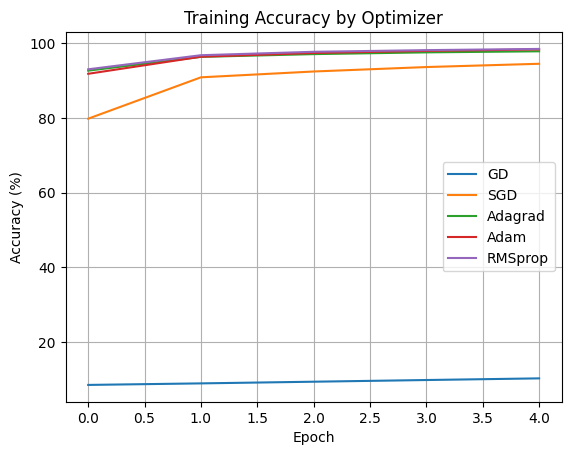

In [ ]:
optimizers = ["GD", "SGD", "Adagrad", "Adam", "RMSprop"]
results = {}

for opt in optimizers:
    print(f"\nTraining with {opt} optimizer:")
    acc = train_model(opt)
    results[opt] = acc

for opt in optimizers:
    plt.plot(results[opt], label=opt)

plt.title("Training Accuracy by Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()